# Understanding Airspace in Leaves: 3D Anatomy and Directional Tortuosity
## Code to calculate directional tortuosity for the whole leaf and leaf sub volumes

#### Load packages
#### Not all are needed but they are all useful for image analysis

In [2]:
import sys
import os
import numpy as np
from pandas import DataFrame
from scipy import stats
from scipy.ndimage.morphology import distance_transform_edt, binary_erosion
import skfmm
import skimage.io as io
from skimage import img_as_ubyte
from skimage.util import invert
from skimage.measure import label, regionprops, marching_cubes_lewiner, mesh_surface_area
from skimage.transform import resize
import time
from tqdm import tqdm
import joblib
import multiprocessing
import cv2
from os import listdir
import matplotlib.pyplot as plt 
import openpnm as op
import porespy
import pytrax as pt
from scipy import ndimage

## Define a Threshold Function 

In [3]:
def Threshold(input_img, Th_value):
    tmp = np.zeros(input_img.shape, dtype=np.bool)
    if isinstance(Th_value, int):
        tmp[input_img == Th_value] = 1
    else:
        if isinstance(Th_value, float):
            tmp[input_img > 0. & input_img < 1.] = 1
        else:
            for th_val in range(len(Th_value)):
                tmp[input_img == Th_value[th_val]] = 1
    return tmp

## Set the image directory - eventually this should download straight from Zenodo

In [5]:
image_dir = "C:/Users/rhar4/Desktop/3D EUC GITHUB/"

array([ 42,  63,  74,  85,  89,  95, 106, 113, 124, 127, 129, 138, 140,
       148, 154, 155, 166, 170, 183, 196, 212], dtype=uint8)

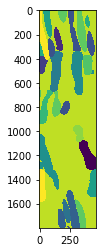

In [6]:
composite_stack = io.imread(image_dir + 'E parramattensis-Whole Leaf.tif')
plt.imshow(composite_stack[1])
np.unique(composite_stack[1])

### The above image shows there are multiple grey scale values - this is the from the image we used to get cell volume and surface area so we need to make a binary version

### Set the airspace value - and check it makes an image that is airspace (yellow) and cells (purple)

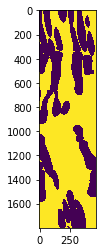

In [7]:
ias_value = 196
airspace_stack = Threshold(composite_stack, ias_value)
plt.imshow(airspace_stack[1])

### The above is a TRUE/FALSE image but we need a 0/1 image 

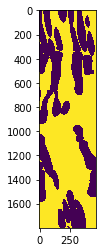

In [8]:
imleaf=(airspace_stack).astype(int)
plt.imshow(imleaf[1])

## Implement Random Walk Code
https://www.sciencedirect.com/science/article/pii/S2352711019302286

## Guide for setting up simulation 
### The creators of Pytrax suggest: 
#### "I would run the simulation for at least 2 or 3 times as long as your smallest image dimension squared"

In [9]:
np.shape(imleaf)

(532, 1800, 471)

In [10]:
471**2*3

665523

In [11]:
rw = pt.RandomWalk(imleaf)

Method is not implemented for 3d images
Please use export for visualizing 3d walks in paraview
##############################
Square Displacement:
Tau: 1.447, R^2: 0.999
Axis 0 Square Displacement Data:
Tau: 1.184, R^2: 0.999
Axis 1 Square Displacement Data:
Tau: 1.28, R^2: 1.0
Axis 2 Square Displacement Data:
Tau: 2.234, R^2: 0.993
 randomwalk time 746.0 s


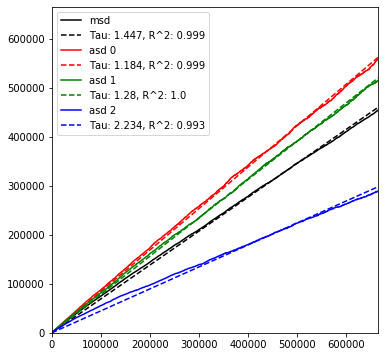

In [12]:
t0 = time.time()
rw.run(nt=665523, nw=10000, stride = 100)
rw.plot_walk_2d(check_solid=True, data='t')
rw.plot_msd()
t1 = time.time() - t0
print (' randomwalk time '+str(np.round(t1))+' s')